# **Install Library**

# **Import Library**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from matplotlib.lines import Line2D
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# **Load Dataset**

In [12]:
dataset1 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/MachineLearningCourse/EventDiscrimintation/Earthquake_Catalog_3.csv"
dataset2 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/MachineLearningCourse/EventDiscrimintation/Earthquake_Catalog_6.csv"

# Load each dataset
df1 = pd.read_csv(dataset1)
df2 = pd.read_csv(dataset2)

# Concatenate the datasets
merged_df = pd.concat([df1, df2], ignore_index=True)

# Display the merged DataFrame
merged_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2019-05-01T23:51:13.170Z,18.5168,-68.7418,112.00,3.43,md,24.0,288.0,0.3604,0.07,...,2019-07-25T18:54:05.040Z,"11 km SSW of Salvaleón de Higüey, Dominican Re...",earthquake,10.09,1.22,0.490,23.0,reviewed,pr,pr
1,2019-05-01T23:33:14.535Z,-4.6068,153.1202,57.15,4.90,mb,NaN,120.0,1.0390,0.65,...,2019-07-25T18:54:05.040Z,"98 km ESE of Kokopo, Papua New Guinea",earthquake,8.50,6.20,0.078,51.0,reviewed,us,us
2,2019-05-01T22:53:38.168Z,61.3840,-150.0146,46.90,2.50,ml,NaN,NaN,NaN,0.42,...,2019-07-25T18:54:05.040Z,"3 km NW of Point MacKenzie, Alaska",earthquake,NaN,0.10,NaN,NaN,reviewed,ak,ak
3,2019-05-01T22:41:13.310Z,17.9718,-68.4458,73.00,2.73,md,20.0,224.0,0.5459,0.63,...,2019-07-25T18:54:05.040Z,"48 km SSE of Boca de Yuma, Dominican Republic",earthquake,4.27,4.47,0.530,17.0,reviewed,pr,pr
4,2019-05-01T22:38:22.320Z,55.3975,160.5594,165.62,4.20,mb,NaN,124.0,2.6300,0.54,...,2019-07-25T18:54:05.040Z,"62 km ESE of Atlasovo, Russia",earthquake,10.70,8.80,0.074,51.0,reviewed,us,us


# **Preprocessing**

In [13]:
# 3. Pilih kolom tertentu
features = [
    'time', 'longitude', 'latitude','depth','mag','type','nst','gap','dmin','rms',
    'horizontalError','depthError','magError'
]

selected_df = merged_df[features]

# 4. Tampilkan
selected_df.head()

,time,longitude,latitude,depth,mag,type,nst,gap,dmin,rms,horizontalError,depthError,magError
0,2019-05-01T23:51:13.170Z,-68.7418,18.5168,112.00,3.43,earthquake,24.0,288.0,0.3604,0.07,10.09,1.22,0.490
1,2019-05-01T23:33:14.535Z,153.1202,-4.6068,57.15,4.90,earthquake,NaN,120.0,1.0390,0.65,8.50,6.20,0.078
2,2019-05-01T22:53:38.168Z,-150.0146,61.3840,46.90,2.50,earthquake,NaN,NaN,NaN,0.42,NaN,0.10,NaN
3,2019-05-01T22:41:13.310Z,-68.4458,17.9718,73.00,2.73,earthquake,20.0,224.0,0.5459,0.63,4.27,4.47,0.530
4,2019-05-01T22:38:22.320Z,160.5594,55.3975,165.62,4.20,earthquake,NaN,124.0,2.6300,0.54,10.70,8.80,0.074


# **Explanatory Data Analysis**

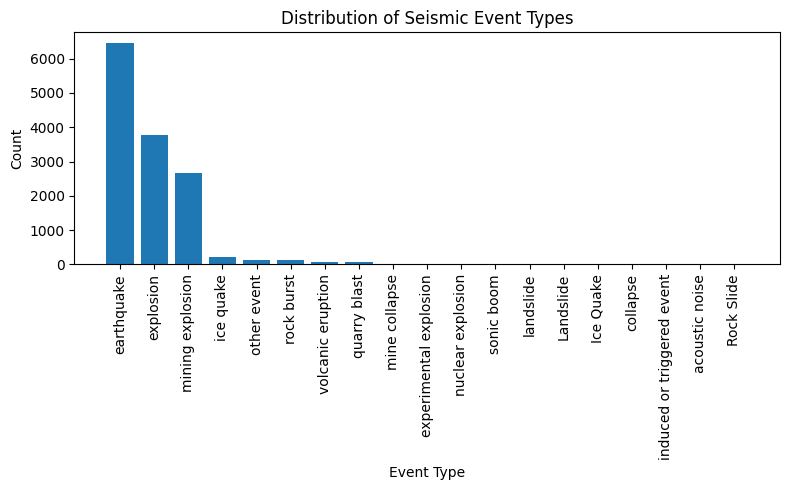

In [14]:
# Count types
type_counts = selected_df['type'].value_counts()

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(type_counts.index, type_counts.values)
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.title("Distribution of Seismic Event Types")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
# Hitung jumlah tiap event type
type_counts = selected_df['type'].value_counts()

# Ubah ke DataFrame agar tampil rapi sebagai tabel
type_table = type_counts.reset_index()
type_table.columns = ['Event_Type', 'Count']

# Tampilkan tabel
type_table


,Event_Type,Count
0,earthquake,6446
1,explosion,3785
2,mining explosion,2672
3,ice quake,221
4,other event,134
5,rock burst,134
6,volcanic eruption,74
7,quarry blast,60
8,mine collapse,16
9,experimental explosion,9


# **Binary Classification**

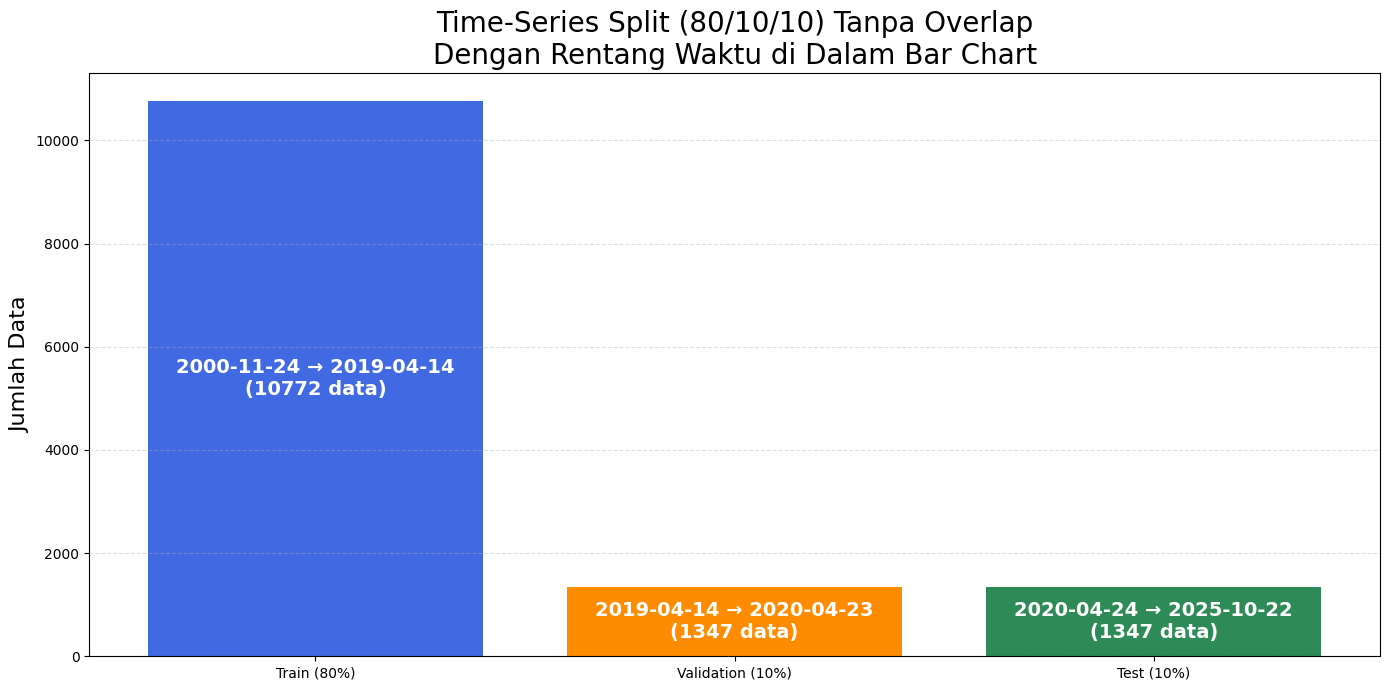

=== RENTANG WAKTU TANPA OVERLAP ===
Train   (10772 data): 2000-11-24 → 2019-04-14
Val     (1347 data):   2019-04-14 → 2020-04-23
Test    (1347 data):  2020-04-24 → 2025-10-22


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# ==============================
# 1. Copy & Persiapan Data
# ==============================

df = selected_df.copy()
df["time"] = pd.to_datetime(df["time"])
df = df.sort_values("time").reset_index(drop=True)

df["binary_label"] = df["type"].apply(lambda x: 1 if x.lower().strip() == "earthquake" else 0)

# ==============================
# 2. Split Time-Series 80 / 10 / 10 (Tanpa Overlap, Berdasarkan Jumlah Data)
# ==============================

n = len(df)
train_end_idx = int(n * 0.8)
val_end_idx = int(n * 0.9)

train_df = df.iloc[:train_end_idx]
val_df   = df.iloc[train_end_idx:val_end_idx]
test_df  = df.iloc[val_end_idx:]

# Rentang waktu
train_range = f"{train_df['time'].min().date()} → {train_df['time'].max().date()}"
val_range   = f"{val_df['time'].min().date()} → {val_df['time'].max().date()}"
test_range  = f"{test_df['time'].min().date()} → {test_df['time'].max().date()}"

# ==============================
# 3. Bar Chart dengan Label Rentang Waktu di Dalam Batang
# ==============================

sizes = [len(train_df), len(val_df), len(test_df)]
labels = ["Train (80%)", "Validation (10%)", "Test (10%)"]
colors = ["royalblue", "darkorange", "seagreen"]
ranges = [train_range, val_range, test_range]

plt.figure(figsize=(14, 7))
bars = plt.bar(labels, sizes, color=colors)

for bar, r, count in zip(bars, ranges, sizes):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height()/2,
        f"{r}\n({count} data)",
        ha='center', va='center',
        color="white", fontsize=14, fontweight='bold'
    )

plt.title("Time-Series Split (80/10/10) Tanpa Overlap\nDengan Rentang Waktu di Dalam Bar Chart", fontsize=20)
plt.ylabel("Jumlah Data", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

# ==============================
# 4. Print Rentang Waktu
# ==============================
print("=== RENTANG WAKTU TANPA OVERLAP ===")
print(f"Train   ({len(train_df)} data): {train_df['time'].min().date()} → {train_df['time'].max().date()}")
print(f"Val     ({len(val_df)} data):   {val_df['time'].min().date()} → {val_df['time'].max().date()}")
print(f"Test    ({len(test_df)} data):  {test_df['time'].min().date()} → {test_df['time'].max().date()}")


## **Random Forest**

Jumlah data:
Train      : 10772
Validation : 1347
Test       : 1347

=== Validation Performance ===
              precision    recall  f1-score   support

           0     0.9971    0.9843    0.9907       702
           1     0.9832    0.9969    0.9900       645

    accuracy                         0.9903      1347
   macro avg     0.9901    0.9906    0.9903      1347
weighted avg     0.9904    0.9903    0.9904      1347


=== Test Performance ===
              precision    recall  f1-score   support

           0     0.9873    0.9957    0.9915       702
           1     0.9953    0.9860    0.9907       645

    accuracy                         0.9911      1347
   macro avg     0.9913    0.9909    0.9911      1347
weighted avg     0.9911    0.9911    0.9911      1347



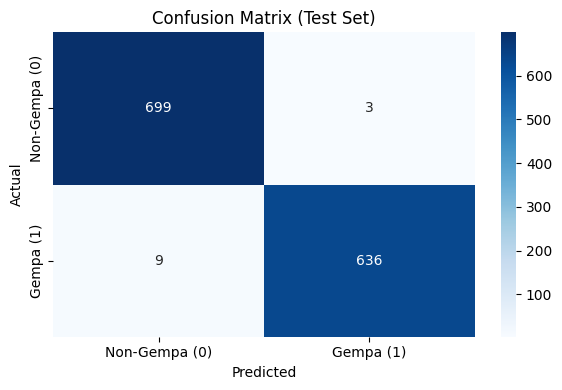

In [21]:
# ===========================
# 1. Copy dataset (agar aman)
# ===========================
selected_df = selected_df.copy()

# ===========================
# 2. Augmentasi: Binary Classification
# ===========================
selected_df.loc[:, 'binary_label'] = selected_df['type'].apply(
    lambda x: 1 if x == 'earthquake' else 0
)

# ===========================
# 3. Preprocess Fitur Numerik
# ===========================
X = selected_df[['depth','mag','nst','gap','dmin','rms',
                 'horizontalError','depthError','magError']].fillna(0)

y = selected_df['binary_label']

# ===========================
# 4. Train-Validation-Test Split (80/10/10)
# ===========================

# 10% untuk test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=y
)

# 10% untuk validation dari 90% data tersisa
# 10/90 = 0.1111 (supaya total jadi 10%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=0.1111, random_state=42, stratify=y_train_val
)

print("Jumlah data:")
print(f"Train      : {len(X_train)}")
print(f"Validation : {len(X_val)}")
print(f"Test       : {len(X_test)}")

# ===========================
# 5. Model: Random Forest
# ===========================
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

model.fit(X_train, y_train)

# ===========================
# 6. Evaluasi Validation Set
# ===========================
print("\n=== Validation Performance ===")
y_val_pred = model.predict(X_val)
print(classification_report(y_val, y_val_pred, digits=4))

# ===========================
# 7. Evaluasi Test Set
# ===========================
print("\n=== Test Performance ===")
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred, digits=4))

# ===========================
# 8. Confusion Matrix (Test)
# ===========================
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-Gempa (0)', 'Gempa (1)'],
            yticklabels=['Non-Gempa (0)', 'Gempa (1)'])
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


## **Support Vector Machine**

Jumlah data:
Train      : 10772
Validation : 1347
Test       : 1347

=== Validation Performance ===
              precision    recall  f1-score   support

           0     0.9857    0.9786    0.9821       702
           1     0.9769    0.9845    0.9807       645

    accuracy                         0.9814      1347
   macro avg     0.9813    0.9816    0.9814      1347
weighted avg     0.9815    0.9814    0.9814      1347


=== Test Performance ===
              precision    recall  f1-score   support

           0     0.9679    0.9872    0.9774       702
           1     0.9857    0.9643    0.9749       645

    accuracy                         0.9762      1347
   macro avg     0.9768    0.9758    0.9762      1347
weighted avg     0.9764    0.9762    0.9762      1347



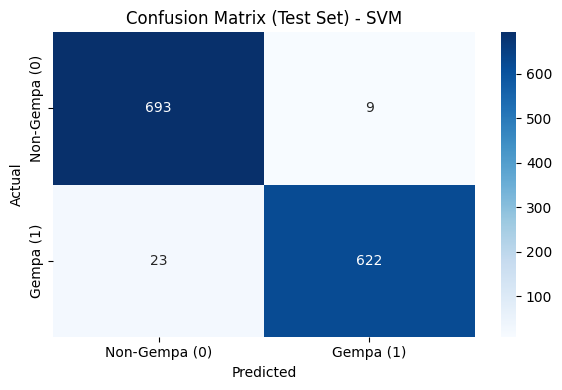

In [22]:
# ===========================
# 1. Copy dataset (agar aman)
# ===========================
selected_df = selected_df.copy()

# ===========================
# 2. Augmentasi: Binary Classification
# ===========================
selected_df.loc[:, 'binary_label'] = selected_df['type'].apply(
    lambda x: 1 if x == 'earthquake' else 0
)

# ===========================
# 3. Preprocess Fitur Numerik
# ===========================
X = selected_df[['depth','mag','nst','gap','dmin','rms',
                 'horizontalError','depthError','magError']].fillna(0)

y = selected_df['binary_label']

# ===========================
# 4. Train-Validation-Test Split (80/10/10)
# ===========================

# 10% untuk test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=y
)

# 10% untuk validation dari 90% data tersisa
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=0.1111, random_state=42, stratify=y_train_val
)

print("Jumlah data:")
print(f"Train      : {len(X_train)}")
print(f"Validation : {len(X_val)}")
print(f"Test       : {len(X_test)}")

# ===========================
# 5. Model: SVM (dengan StandardScaler)
# ===========================
svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(
        kernel='rbf',
        probability=True,
        class_weight='balanced',
        random_state=42
    ))
])

svm_model.fit(X_train, y_train)

# ===========================
# 6. Evaluasi Validation Set
# ===========================
print("\n=== Validation Performance ===")
y_val_pred = svm_model.predict(X_val)
print(classification_report(y_val, y_val_pred, digits=4))

# ===========================
# 7. Evaluasi Test Set
# ===========================
print("\n=== Test Performance ===")
y_test_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_test_pred, digits=4))

# ===========================
# 8. Confusion Matrix (Test)
# ===========================
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-Gempa (0)', 'Gempa (1)'],
            yticklabels=['Non-Gempa (0)', 'Gempa (1)'])
plt.title("Confusion Matrix (Test Set) - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


# **Multiclass Classification**

## **Support Vector Machine**

Jumlah data:
Train      : 10772
Validation : 1347
Test       : 1347

=== Validation Performance ===
              precision    recall  f1-score   support

           0     0.9948    0.8899    0.9394       645
           1     0.9761    0.7546    0.8512       379
           2     0.9667    0.9775    0.9721       267
           3     0.4250    0.7727    0.5484        22
           4     0.1404    0.6154    0.2286        13
           5     0.0784    0.5714    0.1379        14
           6     0.8750    1.0000    0.9333         7

    accuracy                         0.8619      1347
   macro avg     0.6366    0.7974    0.6587      1347
weighted avg     0.9563    0.8619    0.8995      1347


=== Test Performance ===
              precision    recall  f1-score   support

           0     0.9862    0.8853    0.9330       645
           1     0.9646    0.7916    0.8696       379
           2     0.9664    0.9700    0.9682       267
           3     0.5000    0.7727    0.6071        22
      

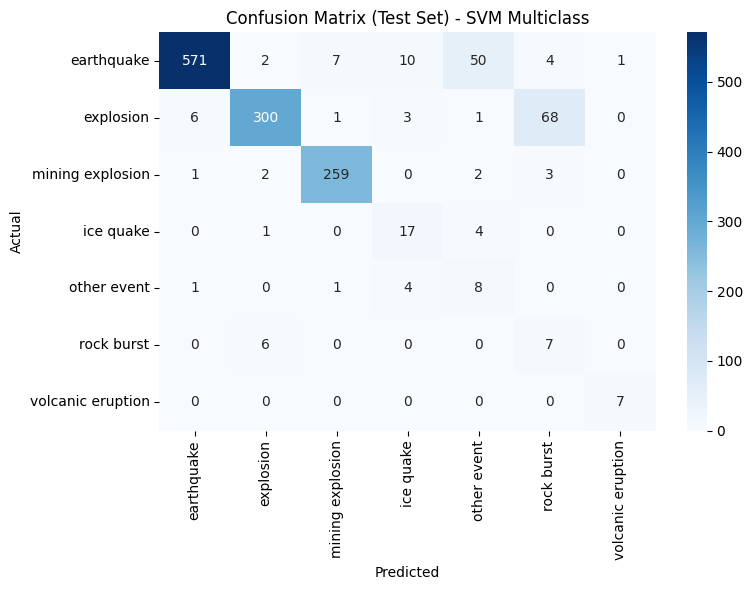

In [23]:
# ===========================
# 1. Copy dataset (agar aman)
# ===========================
selected_df = selected_df.copy()

# ===========================
# 2. Mapping Multiclass
# ===========================
class_map = {
    'earthquake': 0,
    'explosion': 1,
    'mining explosion': 2,
    'ice quake': 3,
    'other event': 4,
    'rock burst': 5,
    'volcanic eruption': 6
}

selected_df['multiclass_label'] = selected_df['type'].map(class_map)

# Buang baris yang kelasnya tidak dikenali
selected_df = selected_df.dropna(subset=['multiclass_label'])

selected_df['multiclass_label'] = selected_df['multiclass_label'].astype(int)

# ===========================
# 3. Preprocess Fitur Numerik
# ===========================
X = selected_df[['depth','mag','nst','gap','dmin','rms',
                 'horizontalError','depthError','magError']].fillna(0)

y = selected_df['multiclass_label']

# ===========================
# 4. Train-Validation-Test Split (80/10/10)
# ===========================
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=0.1111, random_state=42, stratify=y_train_val
)

print("Jumlah data:")
print(f"Train      : {len(X_train)}")
print(f"Validation : {len(X_val)}")
print(f"Test       : {len(X_test)}")

# ===========================
# 5. Model SVM Multiclass
# ===========================
svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(
        kernel='rbf',
        probability=True,
        class_weight='balanced',
        decision_function_shape='ovr',  # one-vs-rest multiclass
        random_state=42
    ))
])

svm_model.fit(X_train, y_train)

# ===========================
# 6. Evaluasi Validation Set
# ===========================
print("\n=== Validation Performance ===")
y_val_pred = svm_model.predict(X_val)
print(classification_report(y_val, y_val_pred, digits=4))

# ===========================
# 7. Evaluasi Test Set
# ===========================
print("\n=== Test Performance ===")
y_test_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_test_pred, digits=4))

# ===========================
# 8. Confusion Matrix (Test)
# ===========================
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(class_map.keys()),
            yticklabels=list(class_map.keys()))
plt.title("Confusion Matrix (Test Set) - SVM Multiclass")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
